In [59]:
!pip install pandas matplotlib seaborn


In [68]:

import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
connection = sqlite3.connect("music_smaller_10000.db")

query = "SELECT * FROM playlists"
playlists = pd.read_sql_query(query,connection)

In [69]:
query = "SELECT * FROM song"
song = pd.read_sql_query(query,connection)

In [70]:
playlists.head()

,slice,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
0,0-999,0,1493424000,52,47,1,6,11532414,37
1,0-999,1,1506556800,39,23,1,5,11656470,21
2,0-999,2,1505692800,64,51,1,18,14039958,31
3,0-999,3,1501027200,126,107,1,4,28926058,86
4,0-999,4,1401667200,17,16,2,7,4335282,16


In [71]:
song.head()

,track_uri,pid,pos,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name
0,spotify:track:4SDywo3ykB2PEthjXvo1UP,6,0,Creedence Clearwater Revival,spotify:artist:3IYUhFvPQItj6xySrBmZkd,I Put A Spell On You,spotify:album:7oIftk0P8cViwNpNEdCYl2,271786,Creedence Clearwater Revival
1,spotify:track:229SqGbacrLSBfb9XfJczF,6,1,STRFKR,spotify:artist:2Tz1DTzVJ5Gyh8ZwVr6ekU,Bury Us Alive,spotify:album:5pfqk4oFycMVynOD8S2Cqs,190360,Reptilians
2,spotify:track:0orNm6qQT2B5WFi0l7l3PV,6,2,311,spotify:artist:41Q0HrwWBtuUkJc7C1Rp6K,Jackolantern's Weather,spotify:album:6VIeIM5tetuv7FrYxISffU,204160,311
3,spotify:track:1hWQvA6oGVJ2mAVsZ59AaV,6,3,Nathaniel Rateliff & The Night Sweats,spotify:artist:02seUFsFQP7TH4hLrTj77o,S.O.B.,spotify:album:2UCyiayMoJOwBilPLQPQvK,247612,Nathaniel Rateliff & The Night Sweats
4,spotify:track:56SkdBKyR2zOkjk6wVFI9s,6,4,Toadies,spotify:artist:2QMMktUMtwMSwUZATX1cRO,Possum Kingdom,spotify:album:7tFTqVGHceSlXOaz8IylBN,309573,Rubberneck


In [126]:
##¿Existe una relación entre el número de álbumes incluidos en una lista de reproducción y la diversidad de artistas representados en ella?

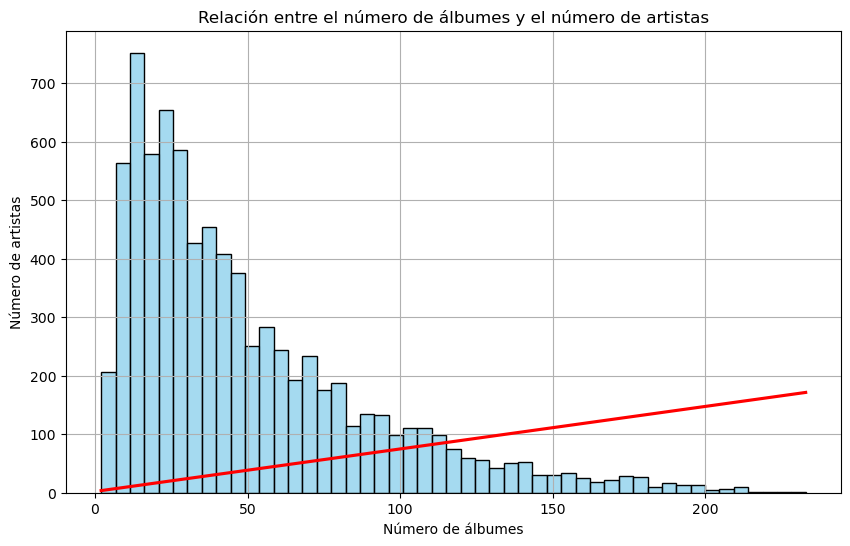

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(playlists, x="num_albums",color="skyblue" )
sns.regplot(playlists, x="num_albums", y="num_artists", scatter=False, color="red")
plt.title("Relación entre el número de álbumes y el número de artistas")  
plt.xlabel("Número de álbumes")  
plt.ylabel("Número de artistas")  
plt.grid(True)  
plt.show()
# este histograma muestra la distribución del número de álbumes en las listas de reproducción y la relación entre el número de álbumes y el número de artistas. Si la líneade regresion (linea en rojo) tiene una pendiente positiva, indica una variación positiva entre estas dos variables, lo que significa que a medida que aumenta el número de álbumes, también tiende a aumentar el número de artistas en las listas de reproducción. 


In [ ]:
##¿Existe alguna relación entre el número de ediciones de una lista de reproducción y su duración total, considerando el número de seguidores como un factor adicional? 

In [111]:
connection = sqlite3.connect('music_smaller_10000.db')

In [112]:
query_playlists = "SELECT pid, num_edits, duration_ms, num_followers FROM playlists"
playlists = pd.read_sql_query(query_playlists, connection)

query_song = "SELECT pid, duration_ms, track_name, artist_name FROM song"
song = pd.read_sql_query(query_song, connection)


In [106]:
connection.close()


In [107]:
merged_data = pd.merge(playlists, song, on="pid")


In [108]:
merged_data['duration_min'] = merged_data['duration_ms_x'] / 60000


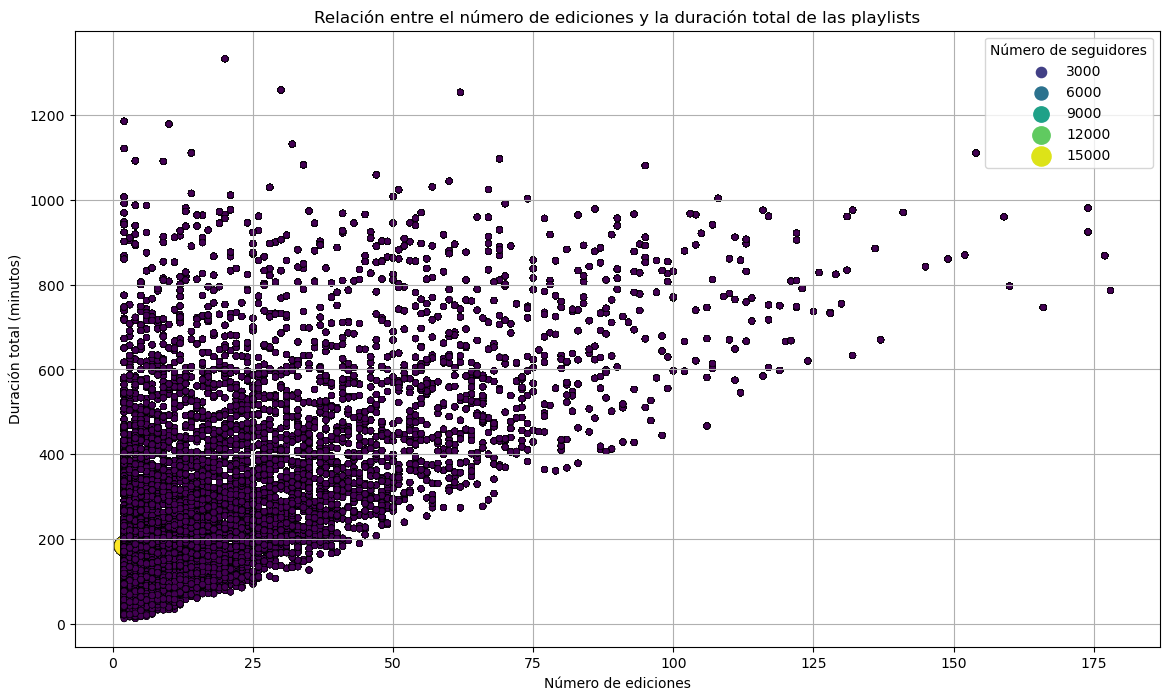

In [109]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=merged_data, x='num_edits', y='duration_min', hue='num_followers', palette='viridis', size='num_followers', sizes=(20, 200), alpha=0.7, edgecolor='k', legend='brief')
plt.title("Relación entre el número de ediciones y la duración total de las playlists")
plt.xlabel("Número de ediciones")
plt.ylabel("Duración total (minutos)")
plt.legend(title='Número de seguidores', loc='upper right')
plt.grid(True)
plt.show()

#para crear este rectangulo primero que todo combine los datos de ambas "data" y luego de eso cree una columna para la duracion total de minutos
#Diseñe un grafico de dispercion para mostrar la relación entre el número de ediciones de una lista de reproducción y su duración total, con los puntos coloreados y dimensionados según el número de seguidores.


In [128]:
##¿Existe alguna relación entre la duración de las listas de reproducción y el número de seguidores que estos tienen?

In [113]:

connection = sqlite3.connect('music_smaller_10000.db')

playlists = pd.read_sql_query("SELECT pid, duration_ms, num_followers FROM playlists", connection)
playlists['duration_min'] = playlists['duration_ms'] / 60000

connection.close()


In [115]:

bins = [0, 30, 60, 90, 120, 150, float('inf')]
labels = ['0-30 mins', '30-60 mins', '60-90 mins', '90-120 mins', '120-150 mins', '150+ mins']
playlists['duration_range'] = pd.cut(playlists['duration_min'], bins=bins, labels=labels)


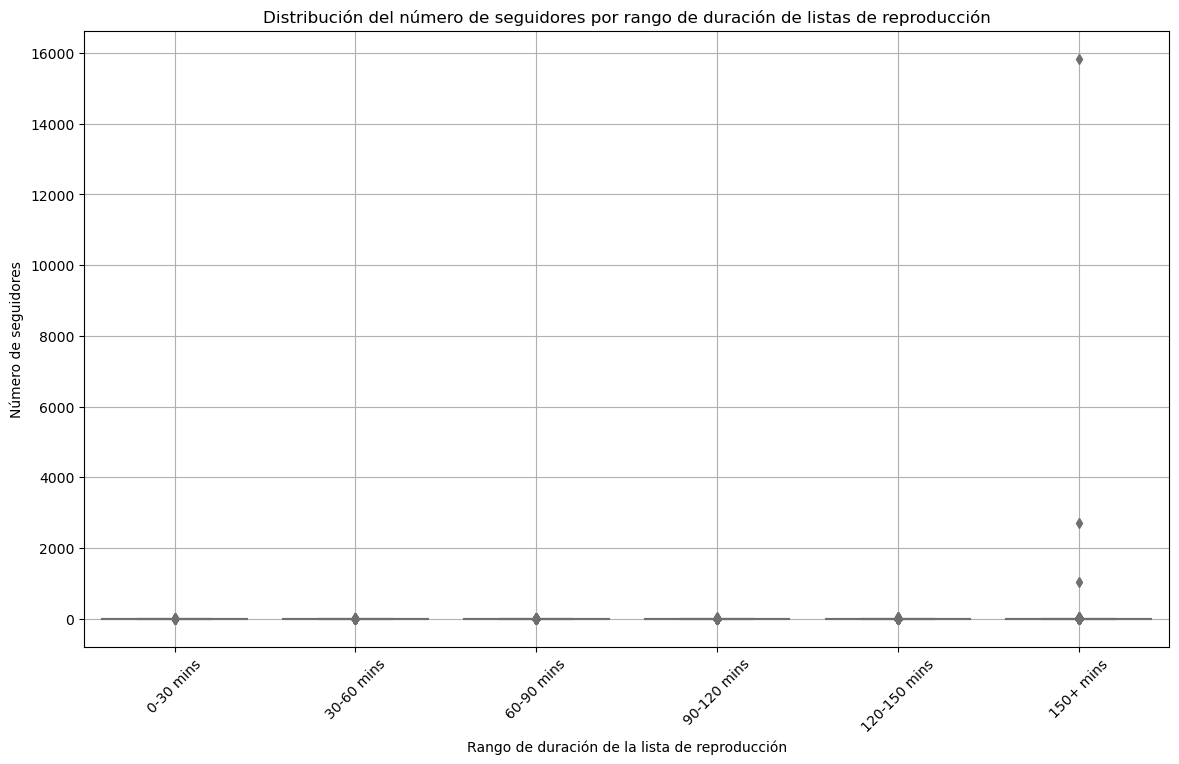

In [116]:

plt.figure(figsize=(14, 8))

sns.boxplot(
    data=playlists,
    x='duration_range',
    y='num_followers',
    palette='pastel'
)
plt.title("Distribución del número de seguidores por rango de duración de listas de reproducción")
plt.xlabel("Rango de duración de la lista de reproducción")
plt.ylabel("Número de seguidores")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#cree una columna categorica para rangos de duracion en minutos
# Con este grafico categorico doy a entender que hay una relación entre la duración de las listas de reproducción y el número de seguidores que tienen. Las listas de reproducción más largas tienden a tener más seguidores,también muestran una mayor variabilidad en el número de seguidores.


In [127]:
##¿Cuál es la naturaleza de las relaciones entre las diferentes variables numéricas en el conjunto de datos de listas de reproducción?

In [117]:

def cargar_datos():
    connection = sqlite3.connect('music_smaller_10000.db')
    query = "SELECT num_tracks, num_albums, num_followers, num_edits, duration_ms, num_artists FROM playlists"
    datos = pd.read_sql_query(query, connection)
    connection.close()
    return datos

In [119]:
playlists = cargar_datos()

In [120]:
correlation_matrix = playlists.corr()

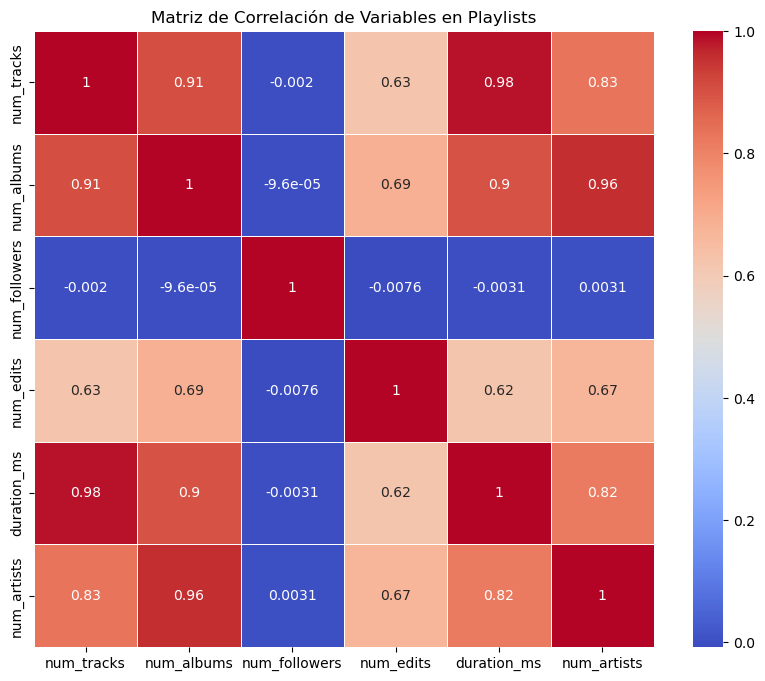

In [121]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables en Playlists')
plt.show()
#con este mapa de calor de clasificación estoy dando una visión rápida y clara de cómo las variables numéricas en el conjunto de datos de listas de reproducción están relacionadas entre sí.Se pueden fácilmente relaciones fuertes y débiles, así como correlaciones positivas y negativas.
#Los colores rojos muestran una potencia negativa,Los colores azules muestran una activación positiva y la intensidad del color muestra la fuerza de la acción.

In [129]:
##¿Cómo afecta el número de ediciones a la duración total de una lista de reproducción?

In [122]:
def cargar_datos_playlists():
    connection = sqlite3.connect('music_smaller_10000.db')
    query = "SELECT num_edits, duration_ms FROM playlists"
    datos_playlists = pd.read_sql_query(query, connection)
    connection.close()
    return datos_playlists

In [123]:
playlists_data = cargar_datos_playlists()

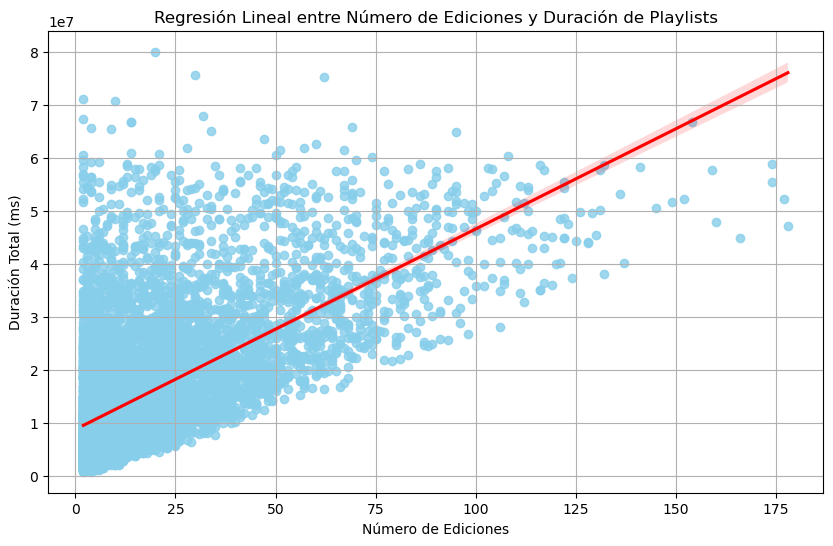

In [124]:
plt.figure(figsize=(10, 6))
sns.regplot(x="num_edits", y="duration_ms", data=playlists_data, scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title("Regresión Lineal entre Número de Ediciones y Duración de Playlists")
plt.xlabel("Número de Ediciones")
plt.ylabel("Duración Total (ms)")
plt.grid(True)
plt.show()
#Con este grafico de regresion puedo entender mejor cómo el número de ediciones puede afectar la duración total de una lista de reproducción.
#Los puntos en el gráfico representan las observaciones individuales, mientras que la línea de regresión lineal ajustada muestra la tendencia general de los datos.
# La pendiente de esta línea indica la relación entre las dos variables: si es positiva, indica que hay una relación positiva entre el número de ediciones y la duración de la lista de reproducción y si es negativa, indica una relación negativa.